<a href="https://colab.research.google.com/github/smlindau/ModelingTrigFunctions/blob/master/MachineLearningSimpleTrigFunctionsV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(7)

Using TensorFlow backend.


In [0]:
T = 1000
X = np.array(range(T))
X = np.arange(-1,1,0.001)
Y = 0.5 * (np.sin(4*np.pi*X)) #+ 0.25 * np.sin(20*np.pi*X) - 0.125 * np.sin(15*np.pi*X)

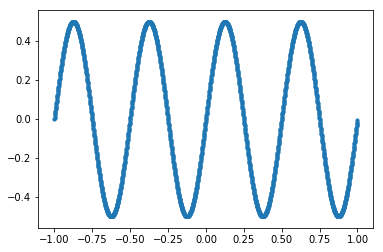

In [3]:
plt.scatter(X, Y, s = 10)
plt.show()

In [4]:
alpha = 2
inputNodes = 1
outputNodes = 1
trainFraction = 0.8

def custom_activation(x):
  return(keras.backend.sin(3.14*x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

numNodes = int(int(trainFraction*len(X))/(alpha*(inputNodes + outputNodes)))
model = Sequential()
model.add(Dense(numNodes, input_dim = 1, activation = custom_activation))
#model.add(Dense(numNodes, activation = 'relu'))
model.add(Dense(outputNodes))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

W0625 17:54:10.236799 140160774158208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 17:54:10.260264 140160774158208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 17:54:10.266134 140160774158208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 17:54:10.402195 140160774158208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [5]:
batchSize = 10000
earlyStop = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100, verbose = 1, mode = 'min')
#history = model.fit(X, Y, epochs = 100, validation_split = 0.25, verbose = 0, callbacks = [earlyStop])
history = model.fit(X[:int((trainFraction)*len(X))], Y[:int((trainFraction)*len(X))], epochs = 1000, 
                    validation_data = (X[-int((1-trainFraction)*len(X)):],Y[-int((1-trainFraction)*len(X)):]), 
                    verbose = 0, callbacks = [earlyStop], batch_size = batchSize)

W0625 17:54:10.540762 140160774158208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0625 17:54:10.606645 140160774158208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



In [6]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,loss,epoch
995,0.108488,0.115281,995
996,0.108498,0.115275,996
997,0.108502,0.115268,997
998,0.108511,0.115261,998
999,0.108517,0.115254,999


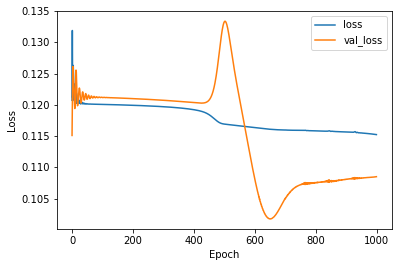

In [7]:
def plotHistory(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
             label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],
             label = 'val_loss')
    #plt.ylim([0,5])
    plt.legend()
    plt.show()

plotHistory(history)

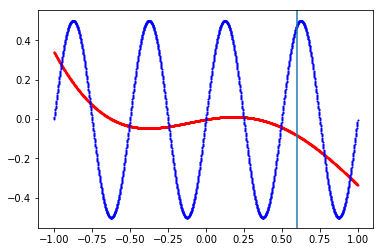

In [8]:
prediction = model.predict(X)
x_plot = X
plt.scatter(x_plot, prediction, s = 1, c = 'r')
plt.scatter(x_plot, Y, s = 1, c = 'b')
plt.axvline(x = 0.6)
plt.show()